# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

**Name:** Tommaso

**Surname:** Amico

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd

scikit-learn version:  0.24.1


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2054778
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labelsT)
print("Frequencies in test set: ", freqsT)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [55 70 65 49 53 55 58 54 71 70]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [394 396 393 426 428 421 386 390 407 359]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


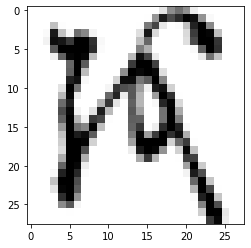

LABEL: 9
INPUT:


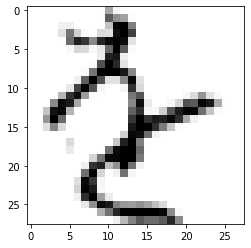

LABEL: 9
INPUT:


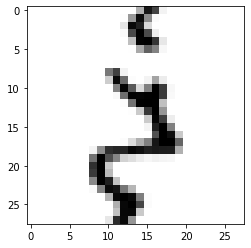

LABEL: 1


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,),(50,), (40,), (20,20,), (40,20,10) ]}

mlp = MLPClassifier(max_iter=100, activation='relu', alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

cross = GridSearchCV(mlp, parameters, cv=5)
cross.fit(X_train, y_train)
print ('RESULTS FOR NN\n', pd.DataFrame.from_dict(cross.cv_results_), "\n")

print("Best parameters set found:", cross.best_params_, "\n")


print("Score with best parameters:", cross.best_score_, "\n")


print("\nAll scores on the grid:")
print(cross.cv_results_['split0_test_score'])
print(cross.cv_results_['split1_test_score'])
print(cross.cv_results_['split2_test_score'])
print(cross.cv_results_['split3_test_score'])
print("\n")
print('\n Mean scores:\n', cross.cv_results_['mean_test_score'].round(3))

RESULTS FOR NN
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.187401      0.013241         0.000488        0.000029   
1       0.179503      0.009987         0.000501        0.000010   
2       0.237962      0.004413         0.000599        0.000020   
3       0.209183      0.010137         0.000593        0.000068   
4       0.126357      0.009324         0.000510        0.000007   
5       0.191486      0.012346         0.000599        0.000004   

  param_hidden_layer_sizes                                params  \
0                    (10,)         {'hidden_layer_sizes': (10,)}   
1                    (20,)         {'hidden_layer_sizes': (20,)}   
2                    (50,)         {'hidden_layer_sizes': (50,)}   
3                    (40,)         {'hidden_layer_sizes': (40,)}   
4                 (20, 20)      {'hidden_layer_sizes': (20, 20)}   
5             (40, 20, 10)  {'hidden_layer_sizes': (40, 20, 10)}   

   split0_test_score  split1_test_sco

### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 8, 32, 80, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, activation='relu', alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
cross = GridSearchCV(mlp, parameters, cv=kf)
cross.fit(X_train, y_train)
# recall to use cv=kf to use the k-fold subdivision seen in the lectures




print ('RESULTS FOR NN\n', pd.DataFrame.from_dict(cross.cv_results_), "\n")

print("Best parameters set found:", cross.best_params_, "\n")


print("Score with best parameters:", cross.best_score_, "\n")


print(cross.cv_results_['split0_test_score'])
print(cross.cv_results_['split1_test_score'])
print(cross.cv_results_['split2_test_score'])
print(cross.cv_results_['split3_test_score'])
print("\n")
print('\n Mean scores:\n', cross.cv_results_['mean_test_score'].round(3))


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.

RESULTS FOR NN
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      15.528349      6.739196         0.000629        0.000014   
1       0.603424      0.132337         0.000583        0.000004   
2       0.254979      0.011842         0.000585        0.000002   
3       0.230685      0.007051         0.000592        0.000008   
4       0.275664      0.009499         0.000888        0.000028   

  param_batch_size               params  split0_test_score  split1_test_score  \
0                1    {'batch_size': 1}           0.083333           0.108333   
1                8    {'batch_size': 8}           0.541667           0.366667   
2               32   {'batch_size': 32}           0.825000           0.725000   
3               80   {'batch_size': 80}           0.833333           0.733333   
4              480  {'batch_size': 480}           0.816667           0.716667   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.1

### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

We see that the best architechture is always with one hidden layer, the cross validation process gives us an hidden layer with 20 neurons.
As far as the batch sizes, the one chosen is always an halfway solution between the standard gradient descent and sgd. The mini batch size found by cross validation is 32. 

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

[0 1 4 2 5 3]
Training MLP of size (10,) ...


<ipython-input-10-d77751fb271c>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hl_sizes = np.array(hl_sizes)[sorting]


Test score:  0.66975
Done, training time: 0.33 sec

Training MLP of size (20,) ...
Test score:  0.7255
Done, training time: 0.25 sec

Training MLP of size (20, 20) ...
Test score:  0.729
Done, training time: 0.16 sec

Training MLP of size (40,) ...
Test score:  0.7465
Done, training time: 0.31 sec

Training MLP of size (40, 20, 10) ...
Test score:  0.6745
Done, training time: 0.30 sec

Training MLP of size (50,) ...
Test score:  0.7515
Done, training time: 0.34 sec



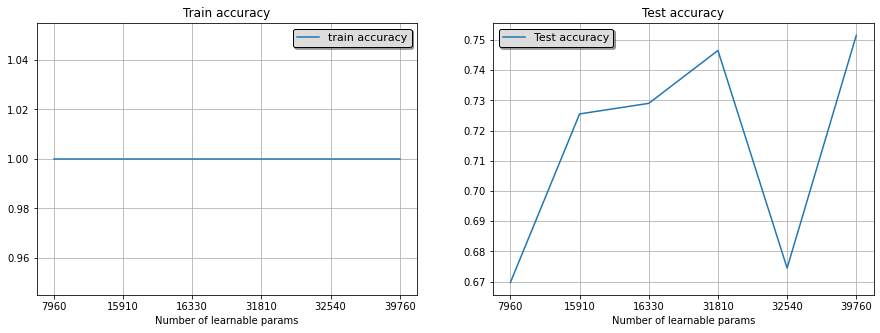

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (50,), (20,20,), (40,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]
sorting = np.argsort(hl_labels)
print(sorting)
hl_labels = np.array(hl_labels)[sorting]
hl_sizes = np.array(hl_sizes)[sorting]
ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp =  MLPClassifier(hidden_layer_sizes=hl_size, max_iter=100, activation='relu', alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
    
    mlp.fit(X_train, y_train)
    print('Test score: ', mlp.score(X_test, y_test))
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list, label='train accuracy')
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)
ax[0].set_title('Train accuracy')
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':11})   


ax[1].plot(test_acc_list, label='Test accuracy')
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':11})   

## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

We see how the test accuracy has a maximum for 31810 paramers, being the optimal value from the one present.
We see that with too many learnable paramaters the test accuracy drops while the train accuracy remains one as overfitting happens.
On the contrary when the learnable parameters are too little it leads to underfitting with train accuracy that stays at 1 and test accuracy that drops

## [ANSWER TO QUESTION 2]

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

Training MLP of size (50,) ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9308002097886904
Training MLP of size (50,) ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.06526139814639811
Training MLP of size (50,) ...
0.003928946671501885
Training MLP of size (50,) ...
0.35984850783137007
Scores:
 {'0.0002': 0.66675, '0.002': 0.7475, '0.02': 0.75525, '0.2': 0.66275}
RESULTS FOR NN


Best parameters set found:  

Score with best parameters: 



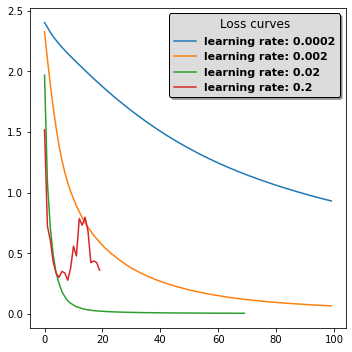

In [11]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores={}
min_loss = float('inf')
mlp = MLPClassifier(hidden_layer_sizes=(50,), batch_size=32, max_iter=100, activation='relu', alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, n_iter_no_change=50)

fig, ax = plt.subplots(1,1, figsize=(5,5))
for lr in lr_list:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp =  MLPClassifier(hidden_layer_sizes=(50,), batch_size=32, max_iter=100, activation='relu', alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=lr)
    
    mlp.fit(X_train, y_train)
    ax.plot(mlp.loss_curve_, label=f'learning rate: {lr}')
    scores[f'{lr}']=mlp.score(X_test,y_test)
    print(mlp.loss_curve_[-1])
    if mlp.loss_curve_[-1] < min_loss:
        min_loss = mlp.loss_curve_[-1]
        best_param = lr
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':'11', 'weight': 'bold'}, title='Loss curves', title_fontsize='large')   
fig.tight_layout()
print('Scores:\n',scores)
print ('RESULTS FOR NN\n'"\n")

print("Best parameters set found:  \n")


print("Score with best parameters:", "\n")


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

The highest learning rate: 0.2 is by far the most unstable of the bunch and does not converge. The lowest of the learning rates is stable but doesn't converge in 100 iterations. The last two (0.02 ans 0.002) seem to converge both but with 0.02 doing it much faster than 0.002.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).

In [12]:
#get training and test error for the best NN model from CV


mlp600 = MLPClassifier(hidden_layer_sizes=(50,), batch_size=32, max_iter=100, learning_rate_init=0.02, activation='relu', alpha=1e-4, solver='sgd', 
                    tol=1e-4, random_state=ID)
mlp600.fit(X_train, y_train)
training_error = 1-mlp600.score(X_train,y_train)
test_error = 1-mlp600.score(X_test,y_test)
print ('\nRESULTS FOR BEST NN\n', mlp600.score(X_train, y_train), mlp600.score(X_test, y_test))

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)




RESULTS FOR BEST NN
 1.0 0.75525
Best NN training error: 0.000000
Best NN test error: 0.244750


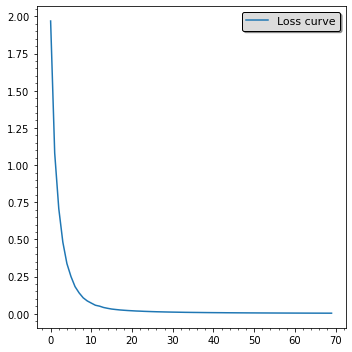

In [13]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.plot(mlp600.loss_curve_, label='Loss curve')
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':'11'})
ax.minorticks_on()
fig.tight_layout()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [14]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [410 383 397 402 405 424 391 414 385 389]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [15]:
# use best architecture and params from before

mlp4000 = MLPClassifier(hidden_layer_sizes=(50,), batch_size=32, max_iter=100, verbose=True, learning_rate_init=0.02,activation='relu', alpha=1e-4, solver='sgd', 
                    tol=1e-4, random_state=ID)
mlp4000.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n', 'train_score: ', mlp4000.score(X_train, y_train), 'test_score: ', mlp4000.score(X_test, y_test))

#get training and test error for the NN

training_error = 1-mlp4000.score(X_train,y_train)
test_error = 1-mlp4000.score(X_test,y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 1.02906807
Iteration 2, loss = 0.50325784
Iteration 3, loss = 0.35728263
Iteration 4, loss = 0.27759896
Iteration 5, loss = 0.21575389
Iteration 6, loss = 0.16024725
Iteration 7, loss = 0.12656359
Iteration 8, loss = 0.09408157
Iteration 9, loss = 0.07426083
Iteration 10, loss = 0.05533276
Iteration 11, loss = 0.04355016
Iteration 12, loss = 0.03441364
Iteration 13, loss = 0.02937502
Iteration 14, loss = 0.02367792
Iteration 15, loss = 0.01991157
Iteration 16, loss = 0.01726110
Iteration 17, loss = 0.01475317
Iteration 18, loss = 0.01353466
Iteration 19, loss = 0.01180457
Iteration 20, loss = 0.01096327
Iteration 21, loss = 0.00989189
Iteration 22, loss = 0.00917180
Iteration 23, loss = 0.00850967
Iteration 24, loss = 0.00802857
Iteration 25, loss = 0.00743396
Iteration 26, loss = 0.00703199
Iteration 27, loss = 0.00667586
Iteration 28, loss = 0.00628446
Iteration 29, loss = 0.00597255
Iteration 30, loss = 0.00570471
Iteration 31, loss = 0.00548905
Iteration 32, los

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


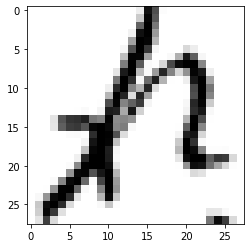

LABEL: 8


In [16]:
NN_prediction = mlp600.predict(X_test)
large_NN_prediction = mlp4000.predict(X_test)
missclassified_index = 0
for i in range(len(X_test)):
    if large_NN_prediction[i] == y_test[i] and NN_prediction[i] != y_test[i]:
        misclassified_index = i
        break

        
plot_input(X_test,y_test,missclassified_index)

        

**Here we plot the sample that the logistic regression predicted (failing). We can see that, as we can expect, that the two samples display some similarities**

INPUT:


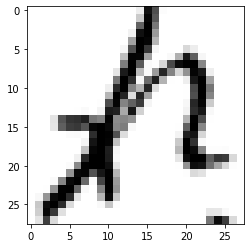

LABEL: 8


In [17]:
index2 = 0
for i in range(len(y_test)):
    if NN_prediction[misclassified_index] == y_test[i]:
        index2 = i
        break
plot_input(X_test, y_test, i)

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


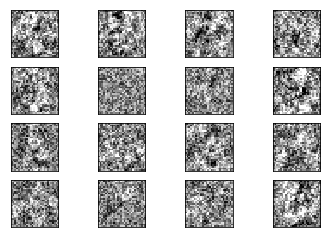

Weights with 4000 data points:


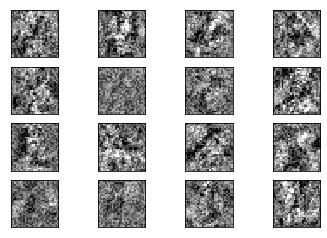

In [18]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp600.coefs_[0].min(), mlp600.coefs_[0].max()
for coef, ax in zip(mlp600.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp4000.coefs_[0].min(), mlp4000.coefs_[0].max()
for coef, ax in zip(mlp4000.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [19]:
m_training = 4000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

svm = SVC(kernel='rbf', C=10, gamma=0.01)
svm.fit(X_train, y_train)

# use best parameters found in the SVM notebook, create SVM and perform fitting



print ('RESULTS FOR SVM', 'training score\n', svm.score(X_train, y_train), 'test score\n',svm.score(X_test, y_test))

SVM_training_error =  1 - svm.score(X_train, y_train)


print('Training error: ',SVM_training_error)

SVM_test_error = 1 - svm.score(X_test, y_test)

print('Test error: ',SVM_test_error)

RESULTS FOR SVM training score
 1.0 test score
 0.9085
Training error:  0.0
Test error:  0.09150000000000003


In [20]:
from sklearn import linear_model


regL2 = linear_model.LogisticRegression(C=1e5, max_iter=1000)
regL2.fit(X_train, y_train)


# you can re-use your code from Lab 2



print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION:', 'training score:\n', regL2.score(X_train, y_train), 'test score:\n',regL2.score(X_test, y_test))

training_error = 1-regL2.score(X_train, y_train)
test_error = 1-regL2.score(X_test, y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION: training score:
 1.0 test score:
 0.71025
Training error (reg): 0.000000
Test error (reg): 0.289750


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

We see that SVM achieve the best results with a very slight margin over NN. The worst of them all is logistic regression with a score of $\approx 0.7$